In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第30章 RSI相對強弱指標

## 30.1 RSI 基本概念

在股票市場上，買方和賣方力量的消長會影響股票的價格。如果股票的買入力量大於賣出力量，則股票的價格會上漲；如果股票的賣出力量大於買入力量，股票的價格會下跌。如何運用一種巧妙的方法來判斷股票的買入力道與賣出力道的強弱？這個問題早在上世紀七十年代被一位投資者提出並最終找到一個解決方案。韋爾斯．威爾德（Wells Wilder）於 1978 年 6 月在 Commodities（現稱為 Future 雜誌）月刊上發表了一種衡量證券自身內在相對強度的指標，即 Relative Strength Index，簡稱「RSI」[<sup>1</sup>](#fn1),中文名為「相對強弱指標」。RSI 是用一種特定公式計算出來的值，投資者可以透過 RSI 的取值來判斷股票的買入和賣出情況，進而預測未來股票的價格走勢。例如，如果股票的買入力道大於股票的賣出力道，我們可以預測股票未來價格可能會上漲。

## 30.2 Python 計算 RSI 值

相對強弱指標 RSI 的值的計算公式如下：

$$\mbox{RSI}=100-\frac{100}{1+\mbox{RS}}$$

<span id="fn1"><sup>1</sup> Wilder J W. New concepts in technical trading system. Trend Research, 1978.</span>

或者

$$\mbox{RSI}=100\times\frac{\mbox{RS}}{1+\mbox{RS}}$$

又

$$\mbox{RS}=\frac{\mbox{UP}}{\mbox{DOWN}}$$

將 $\mbox{RS}=\dfrac{\mbox{UP}}{\mbox{DOWN}}$ 帶入 $\mbox{RSI}=100\times\dfrac{\mbox{RS}}{1+\mbox{RS}}$ 可以推出

$$
\begin{split}
\mbox{RSI}&=100\times\frac{\mbox{UP}/\mbox{DOWN}}{1+\mbox{UP}/\mbox{DOWN}}\\
&=100\times\frac{\mbox{UP}}{\mbox{UP}+\mbox{DOWN}}
\end{split}
$$

即
$$\mbox{RSI}=100\times\frac{\mbox{UP}}{\mbox{UP}+\mbox{DOWN}}$$

其中，RSI 表示相對強弱指標值，若 $t$ 表示所參考數據的期數、UP 表示 $t$ 期內股價上漲幅度的平均值，DOWN 表示 $t$ 天期內股價下跌幅度的平均值。

**Example.**
用一個簡單的例子來說明 RSI 的計算過程。為了簡單方便，本例子將股價取值為整數，單位為「元」。假設某股票的 1 日到 5 日的日收盤價為 18,23,21,20,19。該股票第 2 天上漲 5 元，第 3 天下跌 2 元，第 4 天下跌 1 元，第 5 天下跌 1 元。

表 30.1：收盤價數據表

日期|收盤價|UP|DOWN
----|----|----|----
1日|18|-|-
2日|23|5|-
3日|21| |2
4日|20| |1
5日|19| |1

根據表 30.1，我們利用 5 日的股票收盤價數據來求 4 日 RSI 值，即 $t=4$ 。股價上漲幅度平均值為

$$\mbox{UP}=\frac{5}{4}=1.25$$

股價下跌幅度平均值為

$\mbox{DOWN}=\frac{2+1+1}{4}=1$

用 UP 和 DOWN 的值來計算 RS 的值：

$$
\begin{split}
\mbox{RS}&=\frac{\mbox{UP}}{\mbox{DOWN}}\\
&=\frac{1.25}{1}\\
&=1.25
\end{split}
$$

進而可以求 RSI 的值：

$$
\begin{split}
\mbox{RSI}&=100\times\frac{1.25}{1+1.25}\\
&=55.56
\end{split}
$$

在計算 UP 和 DOWN 的值時，需要求出上漲幅度的平均值和下跌幅度的平均值，一般使用算術平均值來求 UP 和 DOWN。均值可分為簡單移動平均值（SMA）、加權移動平均值（WMA）和指數移動平均值（EMA）。在計算上漲幅度和下跌幅度的平均值時，使用不同的均值計算方式求得的平均值大小有差異，最終會使 RSI 的取值不同。

除了先透過 UP 和 DOWN 求出 RS、由 RS 的值再求 RSI 的值以外，也可以直接運用 UP 和 DOWN 來計算 RSI，即：

$$
\begin{split}
\mbox{RS}&=\frac{\mbox{UP}}{\mbox{UP}+\mbox{DOWN}}\times100\\
&=\frac{1.25}{1+1.25}\times 100\\
&=55.56
\end{split}
$$

從 RSI 的計算公式可以看出，RSI 的取值範圍為 0 到 100。

當 RSI 取值接近於 0 時，由 $\mbox{RSI}=100\times\frac{\mbox{UP}}{\mbox{UP}+\mbox{DOWN}}$ 可得

$$\mbox{UP}\ll\mbox{DOWN},$$

上漲的幅度遠小於下跌的幅度，即跨度時間為 $t$ 時，股票價格下跌的力道遠大於上漲力道。

當 RSI 取值接近於 100 時，由 $\mbox{RSI}=100\times\frac{\mbox{UP}}{\mbox{UP}+\mbox{DOWN}}$ 可得

$$\mbox{UP}\gg\mbox{DOWN},$$

上漲的幅度遠大於下跌的幅度，即跨度時間為 $t$ 時，股票價格上漲的力道遠大於下跌力道。

當 RS 取值為 50 時，由 $\mbox{RS}=\frac{\mbox{UP}}{\mbox{DOWN}}$ 可得

$$\mbox{UP}=\mbox{DOWN}$$

即股票上漲的力道等於下跌的力道。

總而言之，RSI 的取值越大於 50，表明股票上漲的力道更傾向於超過下跌的力道。當 RSI 越小於 50，股票的下跌力道越傾向於超過上漲力道。

**Example.**
用 Python 撰寫程式碼計算統一股價 6 日 RSI 值

用統一「Uni-President」的股票交易數據作為分析的對象，對統一收盤價求 6 日 RSI，其大致思路為：

* 首先，讀取統一的收盤價日度數據，計算出收盤價的變化量；

* 然後，構造包含收盤價「Close」、價格變化「closeDif」、價格上升量「upPrc」、價格下降量「downPrc亅的資料框架；

* 最後求 6 日 RSI 的值。

按照這種思路，運用 Python 逐步計算統一的 6 日 RSI 值。

1. 讀取統一的收盤價日度數據，計算出收盤價的變化量；

In [2]:
# 滙入相關套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 獲取統一股票交易數據
uni_President=pd.read_csv('.\\PythonBook_code_data\\part5\\30\\1216.csv',sep='\t')
uni_President.index=pd.to_datetime(uni_President.Date)
print(uni_President.head())

                  Date  Close   Open   High    Low  Volume
Date                                                      
2015-06-01  2015-06-01  49.02  49.66  49.66  48.75    8941
2015-06-02  2015-06-02  49.84  49.11  50.02  48.93   11150
2015-06-03  2015-06-03  49.20  49.93  49.93  49.02    5111
2015-06-04  2015-06-04  48.84  49.11  49.29  48.20    7476
2015-06-05  2015-06-05  48.38  48.66  48.75  47.47    8480


2.構造包含收盤價「Close」、價格變化「closeDif」、價格上升量「upPrc」、價格下降量「downPrc」的資料框架 rsidata；

In [3]:
Close=uni_President.Close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
closeDif.head()

Date
2015-06-02    0.82
2015-06-03   -0.64
2015-06-04   -0.36
2015-06-05   -0.46
2015-06-08    0.09
Name: Close, dtype: float64

In [4]:
# upprc 表示價格上漲；
# downprc 表示價格下跌；
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
print(rsidata.head())

            Close  closeChange  upPrc  downPrc
Date                                          
2015-06-02  49.84         0.82   0.82     0.00
2015-06-03  49.20        -0.64   0.00     0.64
2015-06-04  48.84        -0.36   0.00     0.36
2015-06-05  48.38        -0.46   0.00     0.46
2015-06-08  48.47         0.09   0.09     0.00


3. 接下來用簡單平均數計算統一收盤價 6 日的上漲力度 SMUP 和下跌力度 SMDOWN，然後計算 6 日 RSI 的值。

In [5]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

#計算rsi
rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(len(SMUP))]
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()

Date
2015-06-09    24.396781
2015-06-10    38.021978
2015-06-11    37.284483
2015-06-12    35.817802
2015-06-15    44.303796
dtype: float64

4. 對 6 日 RSI 的值進行描述性統計分析

In [6]:
Rsi6.describe()

count    387.000000
mean      49.580358
std       21.772020
min        0.000000
25%       36.203156
50%       50.000000
75%       65.692472
max      100.000000
dtype: float64

## 30.3 Python 撰寫 rsi() 函數

前面示範了 RSI 值的程式碼撰寫步驟，若要獲取不同期數的 RSI 或者對其他股票求 RSI 值，按照上面的求解步驟一步步求解即可，但是不免有些麻煩。我們不妨撰寫一個專門求解 RSI 值的函數，透過呼叫函數來求不同價格序列或者不同期數的 RSI 值。

將此函數命名為 'rsi'，函數有兩個參數，分別為價格序列 price 和期數 period，期數默認值為 6。rsi() 函數定義如下：

In [7]:
def rsi(price,period=6):
    import pandas as pd
    closeDif=(price-price.shift(1)).dropna()
    upPrc=pd.Series(0,index=closeDif.index)
    upPrc[closeDif>0]=closeDif[closeDif>0]
    downPrc=pd.Series(0,index=closeDif.index)
    downPrc[closeDif<0]=-closeDif[closeDif<0]
    rsi=[]
    for i in range(period,len(upPrc)+1):
        up_mean = np.mean(upPrc.values[(i-period):i],dtype=np.float32)
        down_mean = np.mean(downPrc.values[(i-period):i],dtype=np.float32)
        rsi.append(100*up_mean/(up_mean+down_mean))
    rsi=pd.Series(rsi,index=closeDif.index[(period-1):])
    return(rsi)

## 30.4 RSI 天數的差異

根據 RSI 的計算過程，可以看出時間跨度 $t$ 是 RSI 取值的一個重要影響因素。韋爾斯．威爾德（Wells Wilder）指出，透過運用月週期 28 日的一半來計算 RSI 的值進行預測是有效的，他推薦 RSI 的時間跨度默認值為 14 日。一些常用的看盤軟體設有 6 日 RSI、12 日 RSI 和 24 日 RSI 這三個 RSI 指標。6 日近似一週的時間週期，12 日可以看作半個月的時間跨度，而 24 日約為一個月的時間跨度。此外，也有人用 RSI1 來代指 6 日相對強度指標，RSI2 表示 12 日相對強度指標，RSI3 表示 24 日相對強度指標。

In [8]:
# 計算統一股價的 12 日 RSI 值
Rsi12=rsi(Close,12)
Rsi12.tail()

Date
2016-12-26    20.454544
2016-12-27    18.604651
2016-12-28    19.512196
2016-12-29    21.621622
2016-12-30    32.558140
dtype: float64

In [9]:
#計算統一股價的24日RSI
Rsi24=rsi(Close,24)
Rsi24.tail()

Date
2016-12-26    37.974685
2016-12-27    40.740745
2016-12-28    37.179487
2016-12-29    35.897437
2016-12-30    38.271606
dtype: float64

RSI 時間跨度的設定不是一成不變的，它可以根據股價情況來進行相應調整，也可以根據我們研究分析的需要來設定，不同時間跨度計算出來的 RSI 值自然會有所不同。例如，可以將 RSI 時間跨度設定為 10 日、25 日、30 日、60 日等；如果股價數據是月數據，我們可以把 RSI 計算的時間跨度設定為 1 個月、9 個月、12 個月、24 個月等。短期 RSI 分析可以用日數據、週數據，長期 RSI 分析可以選擇月數據。在投資分析中，投資者可以參考短期 RSI 和長期 RSI 進行投資決策。短期 RSI 對於價格的變化情況反映比較靈敏，RSI 的值波動較大；長期 RSI 值反應相對遲鈍，其波動相對較小。

## 30.5 RSI 指標判斷股票超買和超賣狀態

回顧本章開頭提出的問題，投資者如何判斷股票的買入程度和賣出程度？韋爾斯．威爾德（Wells Wilder）透過 RSI 指標提供了一個解決方案。我們知道，股票的價格是股票市場供求關係的直接體現。股票價格上漲，我們可以推測股票買入的力道大於賣出的力道。股票價格下跌，則賣出力道超過買入力道。從 RSI 計算公式可知，RSI 值的大小可用於表明股票超買和超賣狀態。

* 當 RSI 取值為 50 時，UP 和 DOWN 的取值相同，股票的買入力道等於股票的賣出力道；

* RSI取值越大，說明 UP 的取值超過 DOWN 取值的程度越大，股票的買入熱度大於賣出熱度的程度越大；

* RSI 取值越小，可以推出說明 DOWN 的取值超過 UP 取值的程度越大，股票的賣出熱度大於買入熱度的程度越大。

__超買線、超賣線和中心線__
RSI 取值等於 80 和 20 為較常用的「超買線」和「超賣線」的刻畫。RSI 為 80 是股票超買的臨界點，RSI 為 20 是股票超賣的臨界點，RSI 取值為 50 設定為「中心線」，該線表明股票的買入力道等於賣出力道。具體可參照圖 30.1。

Text(0.5, 1.0, 'RSI6 的超買線和超賣線')

(-10, 110)

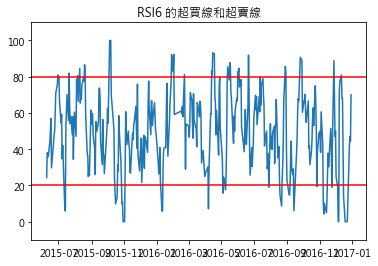

In [23]:
plt.plot(Rsi6)
plt.title('RSI6 的超買線和超賣線')
plt.ylim(-10,110)
plt.axhline(y=80,color='red')
plt.axhline(y=20,color='red')
plt.show()

當 RSI 大於 80 時，股票出現超買信號。股票買入力道過大，買入力道在未來可能會減小，所以股票未來價格可能會下跌，此時賣出股票，未來下跌彶再買入股票，從而賺取價差。

當 RSI 小於 20 時，股票出現超賣信號。股票賣出力道過大.賣出力道在未來終歸回到正常，因此股票未來價格可能會上漲，投資者此時可以做多股票，未來價格上漲後再賣出。

超買線和超買線的制定可以有所變化，RSI 值為 90 和 10 也可以作為股票超買線和超賣線的制定標準。此外，70 和 30 的超買和超買線已被驗證能有效預測未來股價的走勢，併為投資者和學者廣泛使用。

**Example.**
繪製統一股票的收盤價和 6 日 RSI 的曲線圖，來觀察 RSI 取值與股價走勢的關係。

Text(0, 0.5, 'Close')

Text(0.5, 1.0, '統一股票收盤價')

Text(0, 0.5, 'Rsi6')

Text(0.5, 1.0, '統一股票 6 日 RSI')

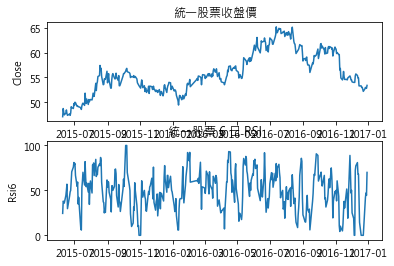

In [11]:
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')
plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('統一股票 6 日 RSI')
plt.show()

圖 30.2：統一股票收盤價和6日RSI

從統一股票收盤價和 6 日 RSI 圖中可以看出，當 6 日 RSI 在 80 線以上時.股價來比較傾向於向下走；當 6 日 RSI 在靠近 0 時，股價未來反轉向上的情況較多。

### 30.6 RSI 的「黃金交叉」與「死亡交叉」

在股票市場使用 RSI 指標時，一般會定義不同時間跨度的 RSI 值。當短期 RSI 線向上穿過長期 RSI 線時，股票近期買入的力道較強，價格上漲的力道很大，其釋放出一個較強的買入信號，這個信號被稱為「黃金交叉亅。當短期 RSI 線向下跌破長期 RSI 線時，股票近期賣出的力道較強，價格下跌的力道很大，其釋放出一個較強的賣出信號，被稱為「死亡交叉」。

**Example.**
以統一股價為例，用 Python 繪製出 RSI 的黃金交叉和死亡交叉線。繪製 6 日 RSI 和 24 日 RSI 的曲線圖，來直觀呈現黃金交叉與死亡交叉情形。

Text(0.5, 1.0, 'RSI黃金交叉和死亡交叉')

(-10, 110)

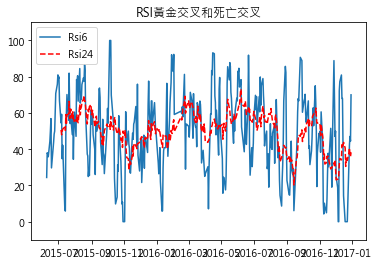

In [12]:
plt.plot(Rsi6,label='Rsi6')
plt.plot(Rsi24,label='Rsi24',color='red',\
         linestyle='dashed')
plt.title('RSI黃金交叉和死亡交叉')
plt.ylim(-10,110)
plt.legend()
plt.show()

圖 30.3：的黃金交叉和死亡交叉

在圖 30.3 中，我們定義 6 日 RSI 為短期 RSI，24 日 RSI 為長期 RSI。觀察 RSI6「實線亅和 RSI24「虛線」走勢圖，可以看出 RSI6 曲線在 0 到 100 之間上下波動，且波動相對較大。RSI24 在 20 到 80 之間上下波動，曲線較為平滑。

從 RSI 的長短線來分析，從圖 30.3 上可以看出，RSI6 曲線在很多情況下都向上穿過 RSI24 曲線，出現不少「黃金交叉」信號。對照收盤價的時序圖，可以看出「黃金交叉亅信號附近股價大致處於上漲行情。圖 30.3 也有不少「死亡交叉」信號出現，RSI6 曲線由上向下穿過 RSI24 曲線。

## 30.7 統一股票 RSI 指標交易實測

以統一股票為例，用 Python 撰寫程式碼計算出 RSI 值，並運用 RSI 值制定交易策略。程式碼主要思路如下：

__數據準備__：獲取統一股票數據，提取出收盤價數據。

__捕捉買賣__：計算 RSI6 和 RSI24 的值，當 $\mbox{RSI6}>80$ 或者 RSI6 向下穿過 RSI24 時，為賣出信號。當 $\mbox{RSI6}<20$ 或者 RSI6 向上穿過 RSI24 時，為買入信號。

__交易策略執行__：按照 RSI 的買賣點買入或者賣出股票。

__回測__：對交易策略進行投資評價。

### 30.7.1 RSI捕捉統一股票買賣點

1. 股票交易數據是計算 RSI 指標與制定交易策略的基礎。在底下程式碼中，從讀取統一股票交易數據開始，撰寫 RSI 交易策略的程式碼。

In [13]:
# 提取統一股票的交易數據
uni_President=pd.read_csv('.\\PythonBook_code_data\\part5\\30\\1216.csv',sep='\t')
uni_President.index=pd.to_datetime(uni_President.Date)
Close =uni_President.Close

2. 計算統一股價 RSI 的值並捕捉相關買賣點信號

In [14]:
rsi6=rsi(Close,6)
rsi24=rsi(Close,24)

# rsi6 的超買與超賣
Sig1=[]
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)

Date
2015-07-13    1
2015-07-14    1
2015-10-15    1
dtype: int64

In [15]:
Signal1[Signal1==-1].head(n=3)

Date
2015-06-30   -1
2015-07-21   -1
2015-08-06   -1
dtype: int64

In [16]:
# 交易信號二：黃金交叉與死亡交叉
    Signal2=pd.Series(0,index=rsi24.index)
    lagrsi6= rsi6.shift(1)
    lagrsi24= rsi24.shift(1)
    for i in rsi24.index:
        if (rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
            Signal2[i]=1
        elif (rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
            Signal2[i]=-1

Signal1 的值取 1 表明 rsi6 低於超賣線，預測未來價格要回升，釋放出買入信號；Signal2 的值取 1 時，表明短期 rsi6 從下向上穿過長期 rsi24，價格可能有上升的趨勢，釋放出買入的信號；Signal1 取值 -1 時，表示 rsi6 的值高出超買線，價格可能有回落的趨勢，釋放出賣出信號；Signal2 取值時，表示表明短期 rsi6 從上向下穿過長期 rsi24，釋放出賣出的信號。

3. 將這兩種交易信號結合起來，當 rsi6 低於超賣線或者短期 rsi6 從下向上穿過長期 rsi24 兩者任一出現，則表示有買入信號，當 rsi6 高出超買線或者短期 rsi6 從下向下穿過長期 rsi24 兩者任一出現，則表示有賣出信號。若兩者出現相反的買賣信號，則不進行交易買賣處理，signal 取值為 0。

In [17]:
# 合併交易信號
signal=Signal1+Signal2
signal[signal==2] = 1
signal[signal==-2] = -1
signal=signal.dropna()

### 30.7.2 RSI 交易策略執行及回測

運用 RSI 指標捕捉統一的買賣點，RSI 指標無法對每個交易日數據進行買入或者賣出的判斷。在大部分交易日中，RSI 取值在正常範圍內，只有個別交易日期 RSI 突破超買線或者超賣線，這些交易日期有可能間隔時間較長。接下來，根據 RSI 釋放的買入和賣出信號執行 RSI 交易策略，並評價交易策略。

In [18]:
tradSig=signal.shift(1)

# 求統一股票收益率
ret=Close/Close.shift(1)-1
ret.head()

Date
2015-06-01         NaN
2015-06-02    0.016728
2015-06-03   -0.012841
2015-06-04   -0.007317
2015-06-05   -0.009419
Name: Close, dtype: float64

In [19]:
# 求買入「做多」交易收益率
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

# 求賣出「做空」交易收益率
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

# 求出買賣交易合併的收益率
tradeRet=ret*tradSig

繪製三種交易收益率的時序圖，展現收益率的分佈情況，如圖 30.4 所示：

Text(0.5, 1.0, '統一股票 RSI 指標交易策略')

Text(0, 0.5, 'strategy return')

Text(0, 0.5, 'stock return')

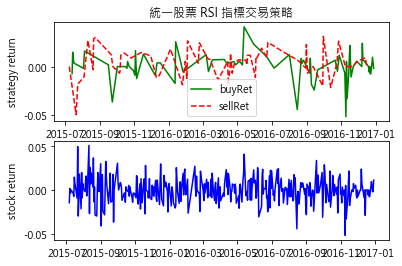

In [20]:
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',color='r',linestyle='dashed')
plt.title('統一股票 RSI 指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

圖 30.4：RSI策略收益率時序圖

計算信號點預測準確率情況，求預測正確時的平均收益率與預測失敗時的平均收益率。

In [21]:
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
            tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss':meanLoss}
    return(perform)

# 計算買入點、賣出點和整個交易點的
# 預測獲勝率、平均獲勝收益率與平均損失收益率
BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
winRate,0.562500,0.655172,0.601626
meanWin,0.010357,0.013396,0.011918
meanLoss,-0.012551,-0.012753,-0.012635


比較 RSI 指標交易策略的累積收益率。

Text(0, 0.5, 'cumulative return of stock')

Text(0.5, 1.0, '原始累積收益率')

Text(0, 0.5, 'cumulative return of strategy')

Text(0.5, 1.0, 'RSI指標交易策略累積收益率')

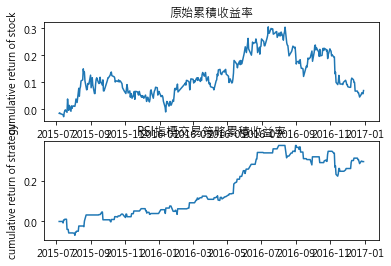

In [22]:
# 求累積收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

# 繪製累積收益率圖
plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')
plt.show()

圖 30.5：RSI 指標交易策表現

從圖 30.5 可以看出，此處對統一股票制定的 RSI 策略與買入持有相比，累積收益率有一定的提高。

本章介紹的 RSI 指標交易策略相對簡單，著重運用 Python 來闡述 RSI 指標的概念與交易思想。在實際分析運用中，讀者可以從以下四大角度來綜合運用 RSI 指標：

1. 根據 RSI 的取值大小判斷市場的超買和超賣熱度；

2. RSI 曲線在高位區或者低位區出現不同的形態，會釋放出不同的買賣信號。

3. 長短線 RSI 的黃金交叉與死亡交叉。

4. RSI 線的走勢與價格線走勢的背離也是一大考慮因素。

此外，在運用 RSI 指標分析市場行情時，還需考慮 RSI 指標有可能會「鈍化」，比如，當市場處於瘋狂牛市時，RSI 突破超買線釋放出的賣出信號則沒有太大意義。